In [1]:
# Instalar biblioteca watermark para visualização de ambiente e versões de pacotes foram usados no projeto
#%pip install -q -U watermark

In [2]:
#%pip install -q -U imbalanced-learn

In [3]:
# Importar bibliotecas
from datetime import datetime

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

pd.set_option('future.no_silent_downcasting', True)

# **Avaliação do Balanceamento de Classes**
* Verifique se as classes do target estão equilibradas.

In [4]:
# Carregar base de dados
df=pd.read_csv("heart_disease_uci_tratado_2.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  num       920 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(5)
memory usage: 88.2+ KB


In [6]:
# Análise do Balanceamento da coluna target 'num'
print("--- ANÁLISE DO BALANCEAMENTO DA VARIÁVEL 'num' ---")
target_counts = df['num'].value_counts()
print("Contagem de cada classe:")
print(target_counts)

--- ANÁLISE DO BALANCEAMENTO DA VARIÁVEL 'num' ---
Contagem de cada classe:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [7]:
# Checando a proporção
print("\Proporção de cada classe (%):")
print(df['num'].value_counts(normalize=True).mul(100).round(2).astype(str) + ' %')

\Proporção de cada classe (%):
num
0    44.67 %
1     28.8 %
2    11.85 %
3    11.63 %
4     3.04 %
Name: proportion, dtype: object


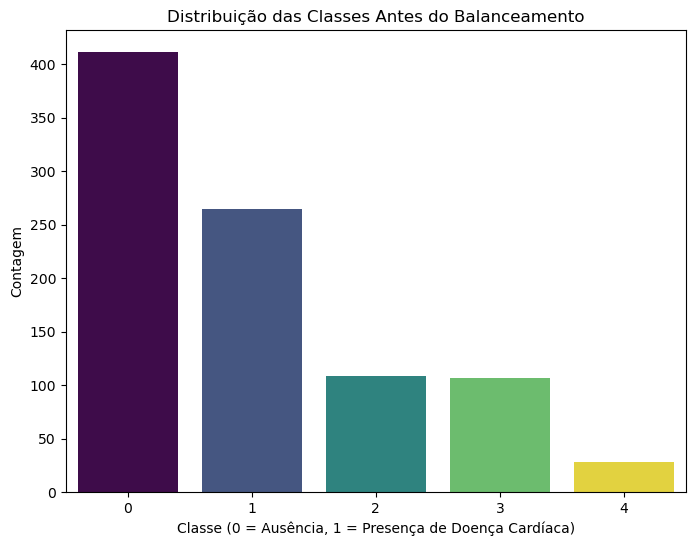

In [8]:
# Visualização
plt.figure(figsize=(8, 6))
sns.countplot(x='num', data=df, palette='viridis', hue='num', legend=False)
plt.title('Distribuição das Classes Antes do Balanceamento')
plt.xlabel('Classe (0 = Ausência, 1 = Presença de Doença Cardíaca)')
plt.ylabel('Contagem')
plt.show()

In [9]:
# Distribuição em %
proporcoes = df['num'].value_counts(normalize=True) * 100

# Diferença entre a maior e a menor classe
diferenca1 = proporcoes.max() - proporcoes.min()

print("Proporção de cada classe (%):")
print(proporcoes.round(2).astype(str) + " %")

print(f"\nDiferença entre a maior e a menor classe: {diferenca1:.2f} %")

Proporção de cada classe (%):
num
0    44.67 %
1     28.8 %
2    11.85 %
3    11.63 %
4     3.04 %
Name: proportion, dtype: object

Diferença entre a maior e a menor classe: 41.63 %


### **Conclusão**:  Os dados estão desbalanceados


A distribuição de classes que você apresentou é a seguinte:

* **Classe 0 (sem doença)**: 411 -> 44,67%
* **Classe 1 (leve)**: 265 -> 28,8%
* **Classe 2 (moderada)**: 109 -> 11,85%
* **Classe 3 (grave)**: 107 -> 11,63%
* **Classe 4 (severa)**-: 28 -> 3,04%

**OBS: Diferença entre a maior e a menor classe: 41.63 %**

# **Estratégias de Tratamento**

São duas principais abordagens:

1. **Redistribuir as classes**
2. **Aplicar técnicas de balanceamento** como:
  * **Undersampling**: Reduzir dados da classe majoritária
  * **Oversampling**: Aumentar dados da classe minoritária (ex: SMOTE, ADASYN)
  * **Técnicas de ponderação de classes (Cost-Sensitive Learning)**: Atribuir pesos diferentes às classes

## **1. Redistribuição das classes**

## **Proposta de redistribuição das classes**:

A nova distribuição fica:

* **Classe 0 (sem doença cardíaca)**: 411 instâncias -> 44,67% 

* **Classe 1 (leve-moderada-grave-severa = presença de doença cardíaca)**: 509 instâncias (265 + 109 + 107 + 28) -> 55,33%

**Nota sobre o pré-processamento**: 
Para a variável-alvo, todas as classes, exceto 0, foram convertidas para 1. Isso simplifica o problema para uma tarefa de classificação binária: 0 = sem doença cardíaca, 1 = presença de doença cardíaca.

In [10]:
# Reagrupamento da coluna 'num'
df = df.assign(
    num_reag = df['num'].map({
        0: 0,       # sem doença
        1: 1, 2: 1, 3: 1, 4: 1  #  # leve + moderada + grave + severa
    }).astype('category')
)

In [11]:
# Contagem absoluta
print("Distribuição das novas classes:")
print(df['num_reag'].value_counts().sort_index())

Distribuição das novas classes:
num_reag
0    411
1    509
Name: count, dtype: int64


In [12]:
# Contagem percentual
print("\nDistribuição em porcentagem:")
print((df['num_reag'].value_counts(normalize=True) * 100).round(2).astype(str) + " %")


Distribuição em porcentagem:
num_reag
1    55.33 %
0    44.67 %
Name: proportion, dtype: object


In [13]:
# Distribuição em %
proporcoes = df['num_reag'].value_counts(normalize=True) * 100

# Diferença entre a maior e a menor classe
diferenca_2 = proporcoes.max() - proporcoes.min()

print("Proporção de cada classe (%):")
print(proporcoes.round(2).astype(str) + " %")

print(f"\nDiferença entre a maior e a menor classe: {diferenca_2:.2f} %")

Proporção de cada classe (%):
num_reag
1    55.33 %
0    44.67 %
Name: proportion, dtype: object

Diferença entre a maior e a menor classe: 10.65 %


In [14]:
# Diferença original
prop1 = df['num'].value_counts(normalize=True) * 100
diferenca1 = prop1.max() - prop1.min()

# Diferença reagrupada
prop2 = df['num_reag'].value_counts(normalize=True) * 100
diferenca2 = prop2.max() - prop2.min()

# Comparação
print(f"Diferença (num original): {diferenca1:.2f} %")
print(f"Diferença (num reagrupado): {diferenca2:.2f} %")
print(f"Redução da diferença: {diferenca1 - diferenca2:.2f} %")

Diferença (num original): 41.63 %
Diferença (num reagrupado): 10.65 %
Redução da diferença: 30.98 %


### **Vantagens desta Abordagem**
* **Redução Drástica do Desbalanceamento**: O principal problema, que era a classe 4 com apenas 28 amostras, foi resolvido. A proporção entre a maior e a menor classe caiu de 41,63% para 10,65%
* **Simplificação do Problema**: Modelos de classificação geralmente têm mais facilidade para aprender com menos classes. Um problema de 2 classes é mais simples e, muitas vezes, leva a um modelo com melhor desempenho geral (acurácia, F1-score, etc.).
**Lógica de Negócio/Clínica**: A união das classes pode fazer muito sentido do ponto de vista prático. Por exemplo, talvez o protocolo clínico para pacientes com doença "leve" e "moderada" seja similar (ex: acompanhamento e medicação). Da mesma forma, pacientes com quadros "grave" e "severo" podem ambos ser classificados como de "alto risco", requerendo intervenção imediata.
**Técnicas de Balanceamento se Tornam Mais Eficazes**: Aplicar SMOTE para aumentar uma classe de 135 amostras é muito mais seguro e eficaz do que aplicá-lo em uma classe com apenas 28. A chance de gerar ruído é menor.

### **Desvantagens desta Abordagem**
* **Perda de Granularidade**: Esta é a principal desvantagem. O modelo perderá a capacidade de diferenciar entre um caso "grave" e um "severo". Se o objetivo final do projeto fosse, por exemplo, priorizar leitos de UTI especificamente para os casos "severos", essa informação seria perdida. A decisão de agrupar as classes depende diretamente do objetivo do negócio ou da aplicação clínica.

## 2. **Aplicar técnicas de balanceamento**


Com essa nova distribuição (411, 374, 135), o problema de desbalanceamento ainda existe, mas é muito mais simples.
O objetivo é fazer com que a classe 2 com 135 instâncias fique o mais perto possível da classe 1 com 374 instâncias. 

**Qual seria a melhor estratégia de balanceamento agora?**

  * **Undersampling**: Reduzir dados da classe majoritária
  * **Oversampling**: Aumentar dados da classe minoritária (ex: SMOTE, ADASYN)
  * **Técnicas de ponderação de classes (Cost-Sensitive Learning)**: Atribuir pesos diferentes às classes

**Decisão**
- **Undersampling** - **Não**, pois não vamos reduzir dados da classe majoritária.
- **Opção 1 - Ponderação de Classe (Cost-Sensitive Learning)** -  Usar o parâmetro class_weight='balanced' no modelo, pois o algoritmo terá exemplos suficientes da classe (2) "grave-severa" para aprender suas características, e a ponderação ajudará a garantir que ele preste a devida atenção a ela.
- **Opção 2 - Oversampling com SMOTE** - Aplicar SMOTE apenas na Classe 2 (grave-severa) para aumentar as amostras de 135 para um número próximo ao das outras classes (~370). Isso criará um conjunto de dados quase perfeitamente balanceado e, como a base de amostras (135) é sólida, a qualidade dos dados sintéticos gerados tende a ser alta.

### Importante: 
* Ambas as técnicas devem ser aplicadas apenas no conjunto de dados de treinamento. O conjunto de teste deve ser mantido com a distribuição original para que você possa avaliar o desempenho real do modelo em dados do mundo real. (Estas técnicas serão aplicadas na etapa de Divisão dos Dados)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        920 non-null    int64   
 1   age       920 non-null    int64   
 2   sex       920 non-null    object  
 3   dataset   920 non-null    object  
 4   cp        920 non-null    object  
 5   trestbps  920 non-null    float64 
 6   chol      920 non-null    float64 
 7   fbs       920 non-null    bool    
 8   restecg   920 non-null    object  
 9   thalch    920 non-null    float64 
 10  exang     920 non-null    bool    
 11  oldpeak   920 non-null    float64 
 12  slope     920 non-null    object  
 13  num       920 non-null    int64   
 14  num_reag  920 non-null    category
dtypes: bool(2), category(1), float64(4), int64(3), object(5)
memory usage: 89.2+ KB


In [16]:
# Inicializar df_final como uma cópia de df
df_final = df.copy()

In [17]:
# Definir o nome do arquivo de saída
nome_do_arquivo = 'heart_disease_uci_tratado_3.csv'

# Salvar o DataFrame em CSV, sem o índice e com codificação UTF-8
df_final.to_csv(nome_do_arquivo, index=False, encoding='utf-8')

# 3. Imprimir uma mensagem de confirmação
print(f"DataFrame foi salvo com sucesso no arquivo: '{nome_do_arquivo}'")

DataFrame foi salvo com sucesso no arquivo: 'heart_disease_uci_tratado_3.csv'


In [18]:
# Carregando a extensão watermark
%reload_ext watermark

In [19]:
# Imprimir
# -a (autor do projeto)
# -d (data)
# -t (hora)
# -v (versões do Python e do IPython)
# -m (informações sobre a máquina (hardware e sistema operacional))
#--iversions (versões de pacotes importadas (import))
%watermark -n -a "Patrick F. R. Ribeiro" -d -t -v -m --iversions

Author: Patrick F. R. Ribeiro

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 8.30.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

sklearn   : 1.6.1
seaborn   : 0.13.2
pandas    : 2.2.3
imblearn  : 0.14.0
matplotlib: 3.10.0

